In [18]:
# install folium
!pip install folium

In [376]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import re
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [333]:
df = pd.read_csv("../data/data_clean.csv", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("Restaurants", axis = 1)#True for every row

We need to convert all the type of cuisines to booleans since they are stored as string for now.

In [334]:
for column in df.columns :
    if df[column][0] == 'True' or df[column][0] =='False':
    #This tests if the column is a boolean by using the first row for efficiency    
        df[column] = df[column]=='True'
        
    #for some columns we have NaN, in that case we test if we find a True or False value
    elif "True" in df[column].values :
        df[column] = df[column]=='True'
    elif "False" in df[column].values :
        df[column] = df[column]=='True'
    

In [335]:
df["romantic"].head()

0    False
1    False
2    False
3    False
4    False
Name: romantic, dtype: bool

In [336]:
df["American (New)"].dtypes

dtype('O')

Let's take a look at the first 5 rows

In [371]:
df["American (New)"].value_counts()


False    46537
True      4639
Name: American (New), dtype: int64

We can see that the cuisine type did not convert to boolean because they have a value of 0 or 1

In [338]:
cuisine_type = ["American (New)","American (Traditional)","Arts & Entertainment","Asian Fusion","Bakeries","Barbeque","Bars",
"Beer","Breakfast & Brunch","Buffets","Burgers","Cafes","Canadian (New)","Caribbean","Caterers","Chicken Wings",
"Chinese","Cocktail Bars","Coffee & Tea","Comfort Food","Delis","Desserts","Diners","Ethnic Food",
"Event Planning & Services","Fast Food","Food","Food Delivery Services","French","Gastropubs","Gluten-Free",
"Greek","Grocery","Halal","Hot Dogs","Ice Cream & Frozen Yogurt","Indian","Italian","Japanese","Juice Bars & Smoothies",
"Korean","Latin American","Lounges","Mediterranean","Mexican","Middle Eastern","Nightlife","Pizza","Pubs",
"Salad","Sandwiches","Seafood","Soup","Specialty Food","Sports Bars","Steakhouses","Sushi Bars","Tex-Mex",
"Thai","Vegan","Vegetarian","Vietnamese","Wine & Spirits","Wine Bars"]

ambiance = ["romantic","intimate","classy","hipster","divey","touristy","trendy","upscale","casual"]



Change data type to boolean for cuisine_type

In [339]:
for column in df[cuisine_type] :
    df[column] = df[column]=="1"

In [340]:
df[cuisine_type].dtypes

American (New)               bool
American (Traditional)       bool
Arts & Entertainment         bool
Asian Fusion                 bool
Bakeries                     bool
Barbeque                     bool
Bars                         bool
Beer                         bool
Breakfast & Brunch           bool
Buffets                      bool
Burgers                      bool
Cafes                        bool
Canadian (New)               bool
Caribbean                    bool
Caterers                     bool
Chicken Wings                bool
Chinese                      bool
Cocktail Bars                bool
Coffee & Tea                 bool
Comfort Food                 bool
Delis                        bool
Desserts                     bool
Diners                       bool
Ethnic Food                  bool
Event Planning & Services    bool
Fast Food                    bool
Food                         bool
Food Delivery Services       bool
French                       bool
Gastropubs    

## Heat map

In [35]:
from folium import plugins
from folium.plugins import HeatMap


# Make an empty map
m = folium.Map(location=[20,0], tiles="Stamen Toner", zoom_start=2)

# Ensure you're handing it floats
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
 
# Filter the DF for rows, then columns, then remove NaNs
heat_df = df[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)


# show the map
m

## Description of the ratings

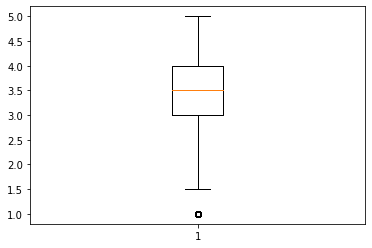

count    51176.000000
mean         3.450377
std          0.766739
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64


In [341]:
df['stars']=df['stars'].astype(float)


box_plot_data = df['stars']
plt.boxplot(box_plot_data)
plt.show()
    

print(df.stars.describe())


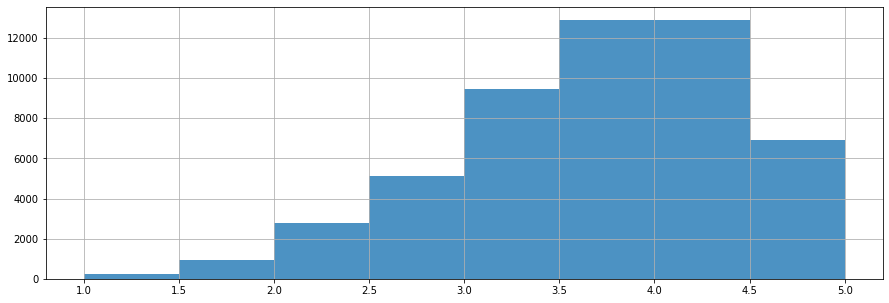

In [365]:
df["stars"].hist(bins=8,
  range=(1,5), # The lowest is 1 star
  density=False,  # show raw counts
  figsize=(15,5), 
  alpha = 0.8 # make the plot 20% transparent
 )

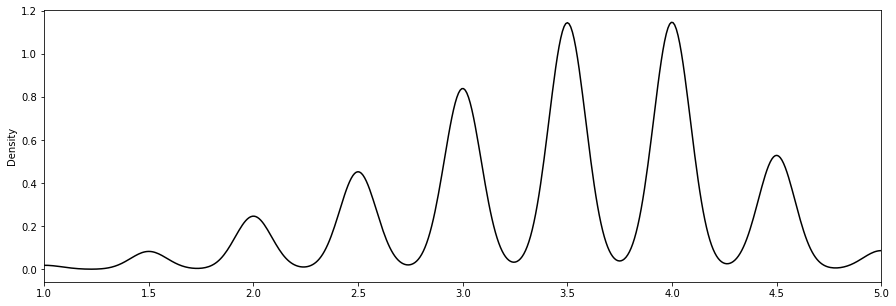

In [368]:
df["stars"].plot(
    kind='kde', 
    color='Black', 
    xlim=(1,5), 
    figsize=(15,5)
)

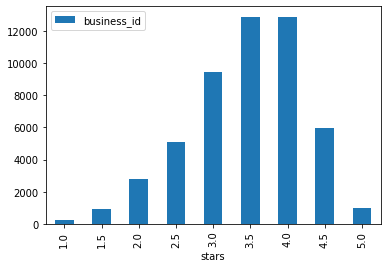

In [342]:
r1 = df[["business_id","stars"]].groupby(["stars"]).count()
r1.plot.bar(x=None, y=None)

count        9.000000
mean      3179.444444
std       6946.466568
min        216.000000
25%        582.000000
50%        805.000000
75%        999.000000
max      21635.000000
dtype: float64

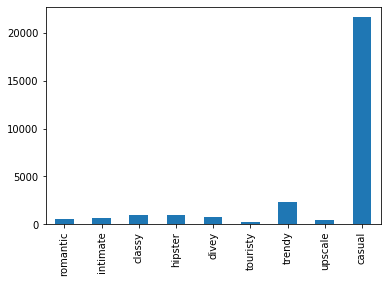

In [374]:
r2 = df[ambiance].sum()
r2.plot.bar(x=None, y=None)
r2.describe()




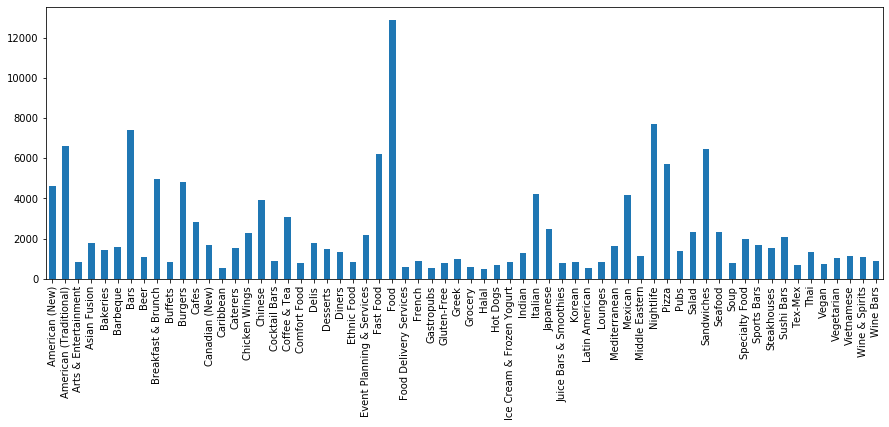

In [375]:
r3 = df[cuisine_type].sum()
r3.plot.bar(x=None, y=None, figsize = (15, 5))





In [ ]:

sns.jointplot(x=df["city"], y=df.stars)

TODO:

Top 10 cuisines by avg. ratings


In [190]:
df.Price = pd.to_numeric(df.Price, errors='coerce')

In [256]:
grouped = df[["city", "Price"]].groupby('city').mean().reset_index()
print(grouped.sort_values('Price', ascending=False))

                           city     Price
544     Saint-Roch-de-l'Achigan  4.000000
180                    EstГ©rel  4.000000
555   Sainte-Marguerite-Esterel  4.000000
597       St-BenoГ®t de Mirabel  4.000000
138             CГґte Saint-Luc  3.000000
530             Saint-Hippolyte  3.000000
492                  Repentigny  3.000000
335               McMasterville  3.000000
23                  Baie-d'Urfe  3.000000
266                L'Assomption  3.000000
490                      Rawdon  3.000000
636                     Tremont  3.000000
629                    Thornhil  3.000000
572                      Sedona  3.000000
575                   Shadyside  3.000000
29                         Bath  3.000000
557               Sainte-Marthe  3.000000
329                  McCandless  3.000000
391              Moreland Hills  3.000000
219                Green Valley  3.000000
155                   Don Mills  3.000000
161                   ETOBICOKE  3.000000
525  Saint-Bruno-de-Montarville  2

In [227]:
grouped = df.sort_values(['Price'],ascending=False).groupby('city').mean()
print(grouped.Price)
#grouped = df.groupby("city")
#grouped.nlargest("Price")
#print(grouped.Price.agg([np.mean, np.std]))

city
AGINCOURT                 1.000000
Agincourt                 1.000000
Ahwatukee                 1.600000
Airdrie                   1.830508
Ajax                      1.762963
Akron                     1.625000
Alberta                   2.000000
Allentown                 2.000000
Allison Park              1.727273
Ambridge                  1.250000
Amherst                   1.358974
Anjou                     2.333333
Anthem                    1.857143
Apache Junction           1.000000
Arnold                    1.666667
Aspinwall                 1.800000
Auburn Township           1.000000
Auburn Twp                2.000000
Aurora                    1.901408
Avalon                    1.333333
Avon                      1.689655
Avon Lake                 1.659574
Avondale                  1.421687
Baie-d'Urfe               3.000000
Baie-d'UrfГ©              1.000000
Bainbridge                1.333333
Bainbridge Township       1.000000
Baldwin                   1.000000
Balzac         